## Text Data : Cleaning, Organising, and Representing

This jupyter notebook walks through the various parts of cleaning text data, as well as the various ways we can represent text data before feeding it into a variety of ML algorithms. 

In [1]:
import gensim
import numpy as np
import spacy
from spacy import displacy
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt
import sklearn
import keras

In [2]:
raw_texts = ["Apples taste like onions when we cannot smell.",
        "I find it easy to compare apples and oranges.",
        "Chopping onions can make you cry.",
        "Peeling an orange does not make you cry."]

In [3]:
nlp = spacy.load('en')

In [4]:
my_stop_words = ['today']
for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

In [5]:
texts, article = [], []
for text in raw_texts:
    doc = nlp(text)
    article = []
    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article!
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num:
            # we add the lematized version of the word
            article.append(w.lemma_)

    texts.append(article)


In [6]:
raw_texts[0]

'Apples taste like onions when we cannot smell.'

In [7]:
texts[0]

['apple', 'taste', 'like', 'onion', 'smell']

In [8]:
bigram = gensim.models.Phrases(texts)

In [9]:
texts = [bigram[line] for line in texts]

In [10]:
texts

[['apple', 'taste', 'like', 'onion', 'smell'],
 ['find', 'easy', 'compare', 'apple', 'orange'],
 ['chop', 'onion', 'cry'],
 ['peel', 'orange', 'cry']]

In [11]:
dictionary = Dictionary(texts)


In [12]:
corpus = [dictionary.doc2bow(text) for text in texts]


In [13]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(0, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(2, 1), (9, 1), (10, 1)],
 [(8, 1), (10, 1), (11, 1)]]

In [14]:
from gensim.models import TfidfModel


In [15]:
tf_idf_model = TfidfModel(corpus)

In [16]:
tf_idf_texts = tf_idf_model[corpus]

In [17]:
tf_idf_texts[0]

[(0, 0.2672612419124244),
 (1, 0.5345224838248488),
 (2, 0.2672612419124244),
 (3, 0.5345224838248488),
 (4, 0.5345224838248488)]

In [18]:
tf_idf_texts[1]

[(0, 0.2672612419124244),
 (5, 0.5345224838248488),
 (6, 0.5345224838248488),
 (7, 0.5345224838248488),
 (8, 0.2672612419124244)]

### Text pre-processing with scikit-learn

I prefer to use gensim and spaCy for pre-processing because it is more clear at each step what my data structure looks like. However, for an abstracted approach to text pre-processing, scikit-learn works well, especially when you want to feed it into a traditional machine learning algorithm.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [20]:
 vectorizer = CountVectorizer()

In [21]:
X = vectorizer.fit_transform(raw_texts).toarray()

In [22]:
print(X)

[[0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0]
 [0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1]]


In [23]:
vectorizer = TfidfVectorizer(stop_words='english')

In [24]:
X = vectorizer.fit_transform(raw_texts).toarray()

In [25]:
print(X)

[[0.38274272 0.         0.         0.         0.         0.48546061
  0.         0.38274272 0.         0.         0.         0.48546061
  0.48546061]
 [0.41428875 0.         0.52547275 0.         0.52547275 0.
  0.         0.         0.         0.52547275 0.         0.
  0.        ]
 [0.         0.66767854 0.         0.         0.         0.
  0.52640543 0.52640543 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.52547275 0.         0.
  0.41428875 0.         0.52547275 0.         0.52547275 0.
  0.        ]]


### Low and High Dimensional Representations of Text and Documents

Let us use a TruncatedSVD to perform a latent semantic analysis on our data.

In [26]:
svd = TruncatedSVD(2)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

In [27]:
X = lsa.fit_transform(X)

In [28]:
X

array([[ 0.80128627,  0.59828114],
       [ 0.41506543,  0.90979156],
       [ 0.93368336, -0.35809968],
       [ 0.66405657, -0.74768233]])

Each document here is represented by 2 features!
We'll now have a quick peak at word and document embedding methods. We're going to use a bigger dataset, because these methods are only useful when we have a lot of data. Models based on very large datasets take a while to train, so we'll use a medium sized one which comes pre-loaded with gensim to illustare the concepts.

In [29]:
import os

In [30]:
test_data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data'])
lee_train_file = test_data_dir + os.sep + 'lee_background.cor'
text = open(lee_train_file).read()

In [31]:
doc = nlp(text.lower())

In [32]:
# we add some words to the stop word list
texts, article = [], []
for w in doc:
    # if it's not a stop word or punctuation mark, add it to our article!
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and w.text != 'I':
        # we add the lematized version of the word
        article.append(w.lemma_)
    # if it's a new line, it means we're onto our next document
    if w.text == '\n':
        texts.append(article)
        article = []

In [33]:
len(texts)

299

In [2]:
from gensim.models import Word2Vec


In [35]:
w2vmodel = Word2Vec(
        texts,
        size=100,
        window=10,
        workers=10,
        iter=10)

In [36]:
w2vmodel.wv.most_similar("war")

[('try', 0.9998903274536133),
 ('terrorism', 0.9998902082443237),
 ('organisation', 0.999885082244873),
 ('end', 0.9998667240142822),
 ('tell', 0.9998652935028076),
 (' ', 0.9998610019683838),
 ('administration', 0.9998598694801331),
 ('send', 0.9998557567596436),
 ('include', 0.9998554587364197),
 ('order', 0.9998529553413391)]

In [40]:
w2vmodel.wv["war"]

array([-0.34525752, -0.12957555,  0.34972474,  0.4155247 , -0.18545586,
       -0.26773235,  0.07060564, -0.10754981, -0.58271134, -0.02812324,
        0.12701893, -0.22439618,  0.24774538, -0.30322817,  0.21102238,
        0.1827755 ,  0.4506811 ,  0.2891772 ,  0.26695222,  0.0706595 ,
       -0.38050628, -0.43690634, -0.10315417, -0.0245578 , -0.02507531,
        0.04661441, -0.5475317 ,  0.18461464, -0.5660164 ,  0.2518374 ,
        0.45197135, -0.19491771, -0.27495465,  0.3672681 , -0.15505324,
       -0.1007716 ,  0.8724897 ,  0.10775444,  0.13028485,  0.46064293,
        0.14717346,  0.18906482, -0.13330121, -0.18262424,  0.23302734,
        0.54573405,  0.08639288,  0.52703696,  0.20400599,  0.05208682,
       -0.49520203, -0.06883708,  0.04259687, -0.16549878, -0.7167367 ,
        0.18014987,  0.7422534 , -0.13168082,  0.13075174, -0.26470852,
        0.09263235, -0.23357728, -0.03404523,  0.63183576, -0.3100732 ,
       -0.47226948, -0.57066786,  0.16443603, -0.35373497,  0.08

In [3]:
model_address = "/Users/bhargavvader/open_source/comp-syn/GoogleNews-vectors-negative300.bin" 

In [4]:
google_w2v_model = gensim.models.KeyedVectors.load_word2vec_format(model_address, binary=True)

In [9]:
google_w2v_model.most_similar("war")

[('wars', 0.748465895652771),
 ('War', 0.6410670280456543),
 ('invasion', 0.5892110466957092),
 ('Persian_Gulf_War', 0.5890660285949707),
 ('Vietnam_War', 0.5886474847793579),
 ('Iraq', 0.588599443435669),
 ('unwinnable_quagmire', 0.5681803226470947),
 ('un_winnable', 0.560634970664978),
 ('occupation', 0.5506216287612915),
 ('conflict', 0.5506188273429871)]

In [8]:
google_w2v_model["war"]

array([ 3.39843750e-01,  3.04687500e-01,  9.86328125e-02,  1.67968750e-01,
       -5.63964844e-02,  2.33154297e-02,  2.73437500e-01, -2.44140625e-01,
        5.41992188e-02,  2.10937500e-01,  3.73535156e-02, -5.56640625e-02,
       -2.83203125e-02,  4.23828125e-01, -8.15429688e-02,  1.47460938e-01,
       -9.52148438e-02, -1.45507812e-01,  9.42382812e-02, -2.55859375e-01,
        5.22460938e-02,  1.74804688e-01,  7.61718750e-02, -1.38671875e-01,
       -3.95507812e-02,  2.04101562e-01,  2.84423828e-02, -2.83203125e-01,
        4.33593750e-01, -1.86523438e-01, -8.39843750e-02, -1.01562500e-01,
       -2.27539062e-01, -8.00781250e-02,  9.88769531e-03, -1.77001953e-02,
       -2.77709961e-03,  1.72851562e-01,  6.12792969e-02, -1.80664062e-02,
        1.04003906e-01,  3.83300781e-02,  4.37500000e-01, -9.17968750e-02,
        1.33789062e-01,  1.14257812e-01,  4.44335938e-02, -3.17382812e-02,
       -1.80664062e-01,  1.33789062e-01,  1.17675781e-01, -1.42578125e-01,
       -2.67578125e-01, -

In [11]:
google_w2v_model.most_similar("spoon")

[('spatula', 0.6753253936767578),
 ('spoons', 0.6649504899978638),
 ('pancake_turner', 0.6564604043960571),
 ('ladle', 0.6539714336395264),
 ('wooden_skewer', 0.6503499746322632),
 ('wooden_spatula', 0.6482176780700684),
 ('soup_spoon', 0.6460204124450684),
 ('ramekin', 0.6428078413009644),
 ('metal_spatula', 0.6349596381187439),
 ('slotted_spoon', 0.6332122087478638)]

Here, one model is trained on our tiny Lee News corpus, and the other is a much larger, Google News trained word2vec model which is easy to download off the net. We use pre-trained models when we think if the semantic meanings of words in our dataset would more or less match what the pre-trained model was trained on. Here, the lee corpus is indeed similar to the google news one, so we're good to go.

### Words as Images and Color

Words have meaning associated to them, and this meaning is formed in many ways. The previous method we saw, word2vec, is based on the notion of "distributional semantics", which means that words get their meaning based on how they are distributed, i.e what kind of words appear around each other. Words like spoon appear around words like spatula and ladle, and maybe lie in a "semantic kitchen", of sorts. But words don't just get their meaning through other words, they also get their meaning through the embodied aspects of human experience, such as vision or sound. 

Work in multi-modal theories of cognition and joint embeddings allow us to represent words using mulitple data sources. The package [comp-syn](https://github.com/comp-syn/comp-syn/) lets us load both average images and color vectors for words.

In [14]:
import compsyn as cs
import PIL
from PIL import Image
import numpy as np

In [15]:
path = "/Users/bhargavvader/open_source/comp-syn/vectors_data/"

In [16]:
disk_vectors = cs.vectors.LoadVectorsFromDisk(path)

In [17]:
disk_vectors.load_colorgram("spoon")

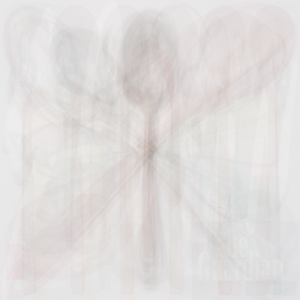

In [18]:
disk_vectors.vectors["spoon"].colorgram

Neat, huh? That image is a composite of 100 images of spoons downloaded from google images and can be thought of as an "average" image of a spoon. comp-syn also has RBG and JzAzBz (human perceptible color representation) vector representations of the word spoon.

In [19]:
disk_vectors.vectors["spoon"].rgb_dist

[3.9738240445479745e-08,
 1.2427330195609368e-09,
 6.615186550505544e-11,
 7.200046236615882e-10,
 6.0791634523004805e-09,
 3.6344928504957475e-09,
 6.0914932165356215e-09,
 4.248967558145478e-07]

In [20]:
disk_vectors.vectors["spoon"].jzazbz_dist

[1.5443596654454392,
 110.44117960225408,
 0.09030894441112076,
 23.274409875341043,
 0.6444088441605241,
 649.3077159017771,
 7.558348899594023,
 48.892767068044215]

There are many ways we can go from an image to a vector. In the notebook on image data, we saw how we can create an image embedding from an image by extracting the representation from a neural network trained to classify images.

In [21]:
from img2vec_pytorch import Img2Vec


In [22]:
img2vec = Img2Vec()

/Users/bhargavvader/open_source/thinking-with-deep-learning/venv/lib/python3.7/site-packages/torchvision/transforms/transforms.py:279: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [25]:
avg_spoon = disk_vectors.vectors["spoon"].colorgram

In [28]:
spoon_img_vec = img2vec.get_vec(avg_spoon)

In [29]:
spoon_img_vec

array([5.14629483e-01, 1.37361616e-01, 9.68453661e-02, 2.44864321e+00,
       3.68885398e-01, 2.12588143e+00, 6.98688924e-02, 2.45071992e-01,
       2.96180248e+00, 5.52304924e-01, 5.19867539e-02, 6.99437484e-02,
       6.97937533e-02, 8.63996863e-01, 9.52431679e-01, 7.30334818e-01,
       0.00000000e+00, 7.87598372e-01, 8.63852680e-01, 1.44910097e-01,
       2.40326114e-02, 5.63538551e-01, 6.59435451e-01, 9.47763771e-03,
       1.20002054e-01, 3.88837941e-02, 2.16037288e-01, 8.71125340e-01,
       2.30171129e-01, 9.55478728e-01, 1.08914399e+00, 2.43684316e+00,
       9.26468492e-01, 6.09005034e-01, 2.80537069e-01, 7.61352777e-01,
       2.68611163e-02, 1.34569064e-01, 2.14975357e+00, 5.47741413e-01,
       2.51136589e+00, 3.05265874e-01, 6.41367063e-02, 6.58354402e-01,
       1.07621551e+00, 3.05058330e-01, 4.48271066e-01, 7.30638206e-02,
       1.17916954e+00, 1.50554419e-01, 1.05346107e+00, 2.49960065e-01,
       8.22983861e-01, 8.43641609e-02, 1.33485603e+00, 0.00000000e+00,
      

So there we go.. word to "average" image, and then image to image embedding via a Convolutional Neural Network.
Take a second to think - what are all these different representations of the same word "spoon" mean?

### Documents as Vectors

So we see how we can represent words as vectors - how about documents? We can think of two methods, to start with - one would be to simply all the words in a document, and the other would be train a model which directly creates document vectors.

In [41]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [42]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(texts)]

In [43]:
d2vmodel = Doc2Vec(documents, vector_size=50)

The function below creates an average word vector or a document vector.

In [44]:
def create_vector(text, model, model_type=None):
    if model_type == "word2vec":
        vectors = []
        for word in text:
            try:
                vectors.append(model.wv[word])
            except KeyError:
                pass
        if len(vectors) > 0:
            return np.mean(vectors, axis=0)
    if model_type == "doc2vec":
        vector = model.infer_vector(text)
        return vector

In [45]:
create_vector(texts[0], w2vmodel, model_type="word2vec")

array([-0.2682142 , -0.07888896,  0.26061997,  0.31413463, -0.11738992,
       -0.20065062,  0.04619072, -0.0772755 , -0.42138678, -0.02469636,
        0.09462594, -0.18488337,  0.2014185 , -0.22424342,  0.16963072,
        0.14139858,  0.34091645,  0.22189157,  0.20122297,  0.05150986,
       -0.27569416, -0.31368142, -0.08673512, -0.01736381, -0.00789848,
        0.01510774, -0.41073263,  0.13885505, -0.42040724,  0.18828356,
        0.33014837, -0.14593379, -0.18917058,  0.28934133, -0.11820923,
       -0.06811216,  0.6573482 ,  0.07705043,  0.09628382,  0.36049658,
        0.10771599,  0.15367366, -0.10155267, -0.12636974,  0.17510927,
        0.41557407,  0.07295226,  0.3965811 ,  0.15871991,  0.03513982,
       -0.37011492, -0.05729943,  0.04417052, -0.12004811, -0.5418533 ,
        0.11611135,  0.57332295, -0.11296045,  0.10464352, -0.21007928,
        0.07600577, -0.17845507, -0.03191077,  0.4627975 , -0.23279038,
       -0.35830045, -0.43013048,  0.12390673, -0.2639923 ,  0.05

In [46]:
create_vector(texts[0], d2vmodel, model_type="doc2vec")

array([-0.14034925, -0.07355043,  0.17530759,  0.31008515, -0.20377183,
       -0.04022722,  0.12827148, -0.05953085, -0.34053314,  0.12919652,
        0.10260154, -0.14444058,  0.35538098, -0.11871804,  0.02506182,
        0.34713542,  0.26218605,  0.2420148 ,  0.1434873 , -0.02697086,
       -0.4388777 , -0.10003196, -0.13411474,  0.19283494,  0.1041904 ,
       -0.05437026, -0.3918465 ,  0.07196473, -0.32920796,  0.3047832 ,
        0.36662868, -0.09508774, -0.28502998,  0.05790954,  0.11061126,
       -0.01562202,  0.5377991 , -0.05626499,  0.07402083,  0.5319284 ,
        0.18036991, -0.05269691,  0.077445  , -0.30860364,  0.12932111,
        0.29683298, -0.24227116,  0.17103316, -0.01458791, -0.10705908],
      dtype=float32)

There we go: those are ways we can represent documents in low dimensions (LSA), as a function of the words in the document (bag of words, TF-IDF), and using popular embedding methods such as word2vec and doc2vec.

### Text pre-processing for deep learning

For deep learning algorithms, we use many of the methods we discussed earlier, such as tokenising and using a vocabulary to convert the words to word ids. Luckily for us, packages such as PyTorch and Keras include extensive pre-processing suites for their text based deep learning models.

Specifically, torch uses torchtext for its text preprocessing. In the following lines of code we use torchtext.data.Field which is a base datatype for text pre-processing: we can tokenise, lowercase and pad our words. Most deep learning applications require to us to mention a sequence length which is constant - so sentences with fewer tokens need to be padded to make the data of uniform length.

In [48]:
import torch
import torchtext
from torchtext.datasets import text_classification

In [62]:
import functools
import operator
from collections import Counter

In [51]:
def spacy_tokenizer(text):
    return [tok.text for tok in nlp.tokenizer(text)]

In [53]:
seq_len  =  15#@param


In [54]:
TEXT = torchtext.data.Field(
  tokenize    = spacy_tokenizer,
  lower       = True,
  batch_first = True,
  init_token  = '<bos>',
  eos_token   = '<eos>',
  fix_length  = seq_len
)

/Users/bhargavvader/open_source/thinking-with-deep-learning/venv/lib/python3.7/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [55]:
minibatch = [ 'The Brown Fox Jumped Over The Lazy Dog' ]
minibatch = list(map(TEXT.preprocess, minibatch))

In [56]:
minibatch = TEXT.pad(minibatch)
print(minibatch)

[['<bos>', 'the', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog', '<eos>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']]


In [63]:
tokens = functools.reduce(operator.concat, minibatch)
counter = Counter(tokens)
counter

Counter({'<bos>': 1,
         'the': 2,
         'brown': 1,
         'fox': 1,
         'jumped': 1,
         'over': 1,
         'lazy': 1,
         'dog': 1,
         '<eos>': 1,
         '<pad>': 5})

In [64]:
vocab = TEXT.vocab_cls(counter)


In [68]:
TEXT.build_vocab(minibatch)

In [65]:
print(vocab.itos)


['<unk>', '<pad>', 'the', '<bos>', '<eos>', 'brown', 'dog', 'fox', 'jumped', 'lazy', 'over']


In [66]:
print(vocab.stoi)


defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x14eaab3d0>>, {'<unk>': 0, '<pad>': 1, 'the': 2, '<bos>': 3, '<eos>': 4, 'brown': 5, 'dog': 6, 'fox': 7, 'jumped': 8, 'lazy': 9, 'over': 10})


In [69]:
TEXT.numericalize(minibatch)

tensor([[ 2,  4,  5,  7,  8, 10,  4,  9,  6,  3,  1,  1,  1,  1,  1]])

The tensors we pass around as input data usually look like this. 